In [2]:
%matplotlib inline
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc

In [2]:
target = [1.5, 2.1, 3.3, -4.7, -2.3, 0.75]
prediction = [0.5, 1.5, 2.1, -2.2, 0.1, -0.5]
error = []
squared_error = []
abs_error = []
for i in range(len(target)):
    val = target[i] - prediction[i]
    error.append(val)
    squared_error.append(val*val)
    abs_error.append(abs(val))
print('Error = {}'.format(error))
print('Squared Error = {}'.format(squared_error))
print('Absolute Error = {}'.format(abs_error))

print('MSE = {}'.format(sum(squared_error)/len(squared_error)))
print('MAE = {}'.format(sum(abs_error)/len(abs_error)))
print('RMSE = {}'.format(np.sqrt(sum(squared_error)/len(squared_error))))

target_mean = sum(target)/len(target)
target_deviation = []
for val in target:
    target_deviation.append((val-target_mean)*(val-target_mean))
target_var = sum(target_deviation)/len(target_deviation)
print('Target Variance = {}'.format(target_var))
print('Target SD = {}'.format(np.sqrt(target_var)))

Error = [1.0, 0.6000000000000001, 1.1999999999999997, -2.5, -2.4, 1.25]
Squared Error = [1.0, 0.3600000000000001, 1.4399999999999993, 6.25, 5.76, 1.5625]
Absolute Error = [1.0, 0.6000000000000001, 1.1999999999999997, 2.5, 2.4, 1.25]
MSE = 2.72875
MAE = 1.4916666666666665
RMSE = 1.651892853668179
Target Variance = 7.570347222222222
Target SD = 2.7514263977475797


If RMSE is greater than target's standard deviation then just using the target mean as prediciton is more effective.

### Measuring Performance for Classifier Trained on Rocks-Versus-Mines

In [3]:
def confusion_matrix(pred, actual, thresh):
    if len(pred)!=len(actual):
        return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #actual label is true
            if pred[i] > thresh: #prediction is also true
                tp += 1.0 #pred true and actual true
            else:
                fn += 1.0 #pred false and actual true
        else: #actual label is false
            if pred[i] < thresh: #prediction is false
                tn += 1.0 #pred false and actual false
            else:
                fn += 1.0 #pred true and actual false
    return [tp, fp, tn, fn]


In [4]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = pd.read_csv(target_url, header=0, sep=',')
labels = data.iloc[:,60]
enc = LabelEncoder()
labels = enc.fit_transform(labels)
data.drop(data.columns[60], axis=1, inplace=True)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=10)
for train_index, test_index in sss.split(data.values,labels):
    X_train, y_train = data.values[train_index], labels[train_index]
    X_test, y_test = data.values[test_index], labels[test_index]
    

rm_model = linear_model.LinearRegression()
rm_model.fit(X_train, y_train)
train_pred = rm_model.predict(X_train)
test_pred = rm_model.predict(X_test)

print(confusion_matrix(train_pred, y_train, 0.5))
print(confusion_matrix(test_pred, y_test, 0.5))


[60.0, 0.0, 69.0, 9.0]
[24.0, 0.0, 28.0, 17.0]


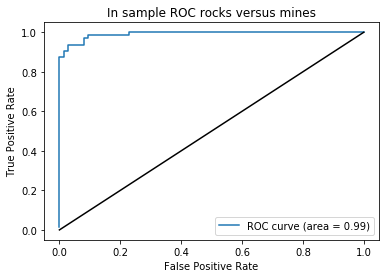

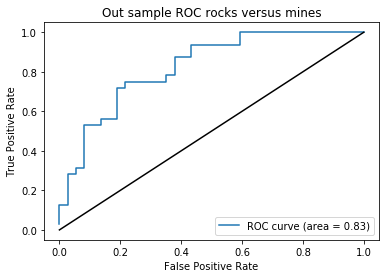

In [5]:
fpr, tpr, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('In sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

### Forward Stepwise Regression: Wine Quality Data

In [5]:
def third_split(data, labels):
    indices = range(data.shape[0])
    X_test = np.asarray([data[i] for i in indices if i%3 == 0 ])
    y_test = np.asarray([labels[i] for i in indices if i%3 == 0])
    X_train = np.asarray([data[i] for i in indices if i%3 != 0 ]) 
    y_train = np.asarray([labels[i] for i in indices if i%3 != 0])
    
    return X_train, y_train, X_test, y_test


['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'pH', 'total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'density', 'citric acid', 'fixed acidity']


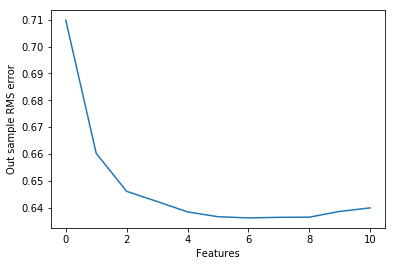

In [7]:
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(target_url, header=0, sep=';')
labels = data['quality']
data.drop('quality', axis=1, inplace=True)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for train_index, test_index in sss.split(data.values, labels):
    X_train, y_train = data.values[train_index], labels[train_index]
    X_test, y_test = data.values[test_index], labels[test_index]
    
#X_train, y_train, X_test, y_test = third_split(data.values,labels)

n_feature = len(data.columns)
test_list = []
train_list = []
feature_id_set = {i for i in range(n_feature)}
feature_list = []
out_sample_error = []

for i in range(n_feature):
    error_log = []
    test_feature_list = []
    
    for j in feature_id_set:
        trial_feature_list = copy.deepcopy(train_list)
        trial_test_list = copy.deepcopy(test_list)
        new_feature = X_train[:,j]
        new_test_feature = X_test[:,j]
        
        trial_feature_list.append(new_feature)
        trial_test_list.append(new_test_feature)
        
        wq_model = linear_model.LinearRegression()
        wq_model.fit(np.asarray(trial_feature_list).T, y_train)
        test_pred = wq_model.predict(np.asarray(trial_test_list).T)
        rms_error = np.linalg.norm(test_pred-y_test, 2)/np.sqrt(len(y_test))
        error_log.append(rms_error)
        test_feature_list.append(j)
        
    best_feature_index = np.argmin(error_log)
    feature_id = test_feature_list[best_feature_index]
    train_list.append(X_train[:,feature_id])
    test_list.append(X_test[:,feature_id])
    feature_list.append(feature_id)
    out_sample_error.append(error_log[best_feature_index])
    feature_id_set.remove(feature_id)


feature_name_list = [data.columns[i] for i in feature_list]
print(feature_name_list)
plt.plot(range(n_feature), out_sample_error)
plt.xlabel('Features')
plt.ylabel('Out sample RMS error')
plt.show()

### Ridge Regression: Wine Quality

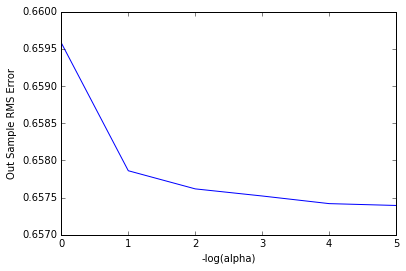

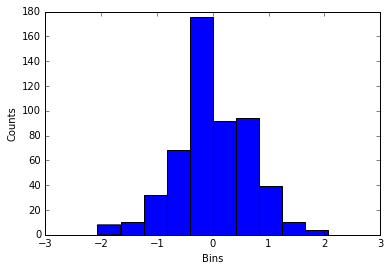

In [6]:
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(target_url, header=0, sep=';')
labels = data['quality']
data.drop('quality', axis=1, inplace=True)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for train_index, test_index in sss.split(data.values, labels):
    X_train, y_train = data.values[train_index], labels[train_index]
    X_test, y_test = data.values[test_index], labels[test_index]
    
X_train, y_train, X_test, y_test = third_split(data.values,labels)

n_feature = len(data.columns)
out_sample_error = []
alpha_range = range(6)
alpha_list = np.power(0.1,alpha_range)

for a in alpha_list:
    wq_ridge_model = linear_model.Ridge(alpha=a)
    wq_ridge_model.fit(X_train, y_train)
    test_pred = wq_ridge_model.predict(X_test)
    rms_error = np.linalg.norm(y_test-test_pred, 2)/np.sqrt(len(y_test))
    out_sample_error.append(rms_error)
    
plt.plot(alpha_range, out_sample_error)
plt.xlabel('-log(alpha)')
plt.ylabel('Out Sample RMS Error')
plt.show()

best_alpha_index = np.argmin(out_sample_error)
wq_ridge_model.set_params(alpha=alpha_list[best_alpha_index])
wq_ridge_model.fit(X_train, y_train)
test_pred = wq_ridge_model.predict(X_test)
plt.hist(y_test - test_pred)
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

### Ridge Regression: Rock vs Mines

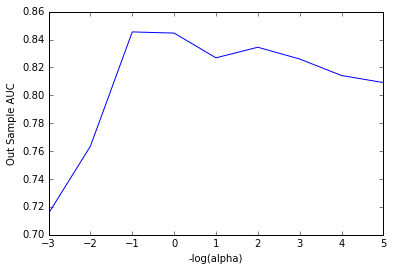

In [18]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = pd.read_csv(target_url, header=0, sep=',')
labels = data.iloc[:,-1].copy()
enc = LabelEncoder()
#labels = enc.fit_transform(labels)
for i in range(len(labels)):
    if(labels[i] == 'M'):
        labels[i] = 1
    else:
        labels[i] = 0
        
data.drop(data.columns[-1], axis=1, inplace=True)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=1)
for train_index, test_index in sss.split(data.values,labels):
    X_train, y_train = data.values[train_index], labels[train_index]
    X_test, y_test = data.values[test_index], labels[test_index]
    
X_train, y_train, X_test, y_test = third_split(data.values,labels)

n_feature = len(data.columns)
out_sample_auc = []
alpha_range = range(-3,6)
alpha_list = np.power(0.1,alpha_range)

for a in alpha_list:
    rm_ridge_model = linear_model.Ridge(alpha=a)
    rm_ridge_model.fit(X_train, y_train)
    test_pred = rm_ridge_model.predict(X_test)
    fpr, tpr, threh = roc_curve(y_test, test_pred)
    roc_auc = auc(fpr,tpr)
    out_sample_auc.append(roc_auc)
    
plt.plot(alpha_range, out_sample_auc)
plt.xlabel('-log(alpha)')
plt.ylabel('Out Sample AUC')
plt.show()
    

In [17]:
labels.iloc[]

SyntaxError: invalid syntax (<ipython-input-17-c2582b26bef7>, line 1)